<a href="https://colab.research.google.com/github/PathakDeepak/TensorFlow_Practise/blob/main/section_3_neural_network_regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural netwrok in TensorFlow

In [1]:
# Import TensoFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


### Creating data to view and fit

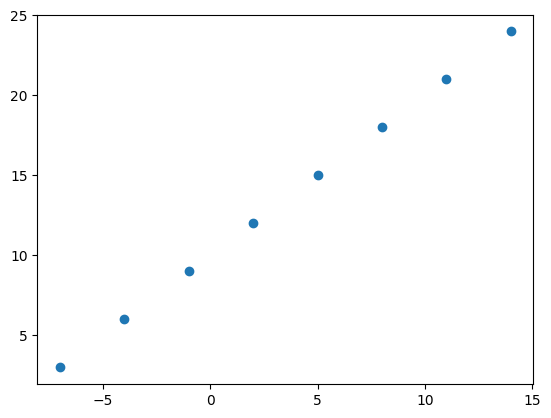

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)

## Input and Output Shapes

In [3]:
# Create a ademo tensor for out housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
# Turn Numpy Array into Tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps with modelling in TensorFLow

- **Creating a model** - define the input and output layers, as well as the hidden layers of deep learning model.
- **Compiling a model** - define the loss function (in other words, the function which tells out model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluating metrics (what we can use to intercept the performance of our mmodel).
- **Fitting a model** - letting the model try to find patterns between X & Y (features and labels).

In [5]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for Mean Absolute Error
           optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8.0011 - mae: 8.0011
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 7.8686 - mae: 7.8686
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.7361 - mae: 7.7361
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.6036 - mae: 7.6036
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4711 - mae: 7.4711


In [6]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
# Try and make a prediction using our mmodel
input_data = np.array([17.0])
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[29.733868]], dtype=float32)

## Improving a model

We can improve our model by altering the steps we took to create a model.

- **Creating a model** - Here we might add layers, increase the number of hidden untis (all called neurons) within each of the hidden layers, change activation function of each layer.
- **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
- **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

In [8]:
# Let's rebuild our model and optimize steps 1 at a time

# 1. Create model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - loss: 17.0262 - mae: 17.0262
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 16.7450 - mae: 16.7450
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 16.4637 - mae: 16.4637
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.1825 - mae: 16.1825
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15.9012 - mae: 15.9012
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.6200 - mae: 15.6200
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.3387 - mae: 15.3387
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15.0575 - mae: 15.0575
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.8208 - mae: 14.8208
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.6883 - mae: 14.6883
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.5558 - mae: 14.5558
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.4233 - mae: 14.4233
Epoch 13/100
1/1 ━━━━━━

In [9]:
# Let's see if out model prediction has improved...
input_data = np.array([17.0])
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[29.295658]], dtype=float32)

In [10]:
# This time add new optimizer to it

# 1. Create model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - loss: 12.1703 - mae: 12.1703
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.1699 - mae: 12.1699
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.1694 - mae: 12.1694
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.1690 - mae: 12.1690
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.1685 - mae: 12.1685
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.1681 - mae: 12.1681
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.1676 - mae: 12.1676
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.1672 - mae: 12.1672
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.1667 - mae: 12.1667
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.1663 - mae: 12.1663
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.1658 - mae: 12.1658
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.1654 - mae: 12.1654
Epoch 13/100
1/1 ━━━━━━━

In [11]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[6.638388]], dtype=float32)

In [12]:
# This time add new optimizer to it, lets add extra hidden layer with 100 hidden units

# 1. Create model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              #optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              #optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.1214 - mae: 14.1214
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.2328 - mae: 13.2328
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.3476 - mae: 12.3476
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 11.4809 - mae: 11.4809
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.6179 - mae: 10.6179
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.9370 - mae: 9.9370
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.2881 - mae: 9.2881
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.6312 - mae: 8.6312
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.9648 - mae: 7.9648
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.2815 - mae: 7.2815
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.5742 - mae: 6.5742
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.8373 - mae: 5.8373
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [13]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[27.54599]], dtype=float32)

## When it comes to evaluation...there are 3 words you should memorize

```Visualize, Visualize, Visualize```

It's good idea to Visualize:
- The data - what data are we working with? What does it look like?
- The model itself - what does our model look like?
- The training of a model - how does a model perform while it learns?
- The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [14]:
# make the bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labels for the dataset
Y = X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

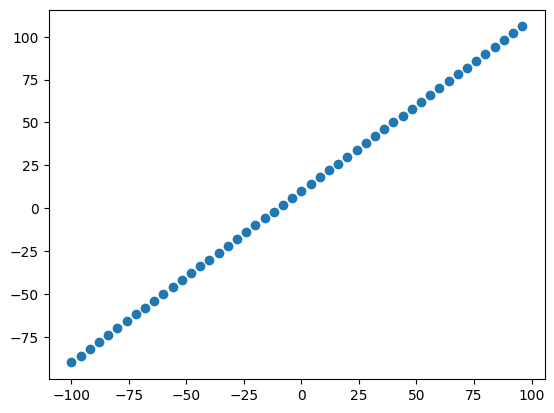

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### The 3 set...

* **Training set** - The model learns from this data, which is typically 70-80% of the total data you have available.
* **validation set** - The model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [17]:
# Check the length of how many samples we have
len(X)

50

In [18]:
# Split the data into train and test sets
X_train = X[:40] # first 4 are training samples (80% of data)
Y_train = Y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our data in training and test sets...let's visualize it again

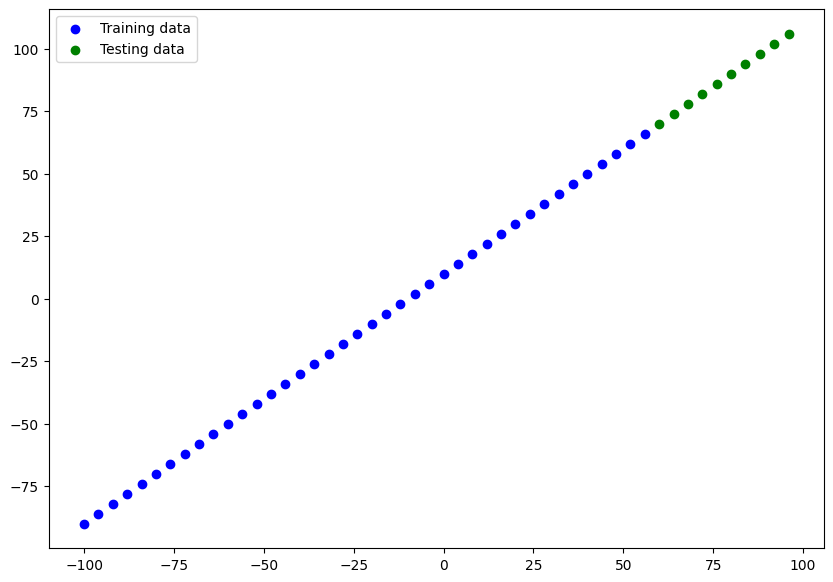

In [19]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# show a legent
plt.legend()

In [20]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output")
], name="one_of_many_models")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
## Visualize the model
model.summary()

Model: "one_of_many_models"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* Total params: total number of parameters in the model.
* Trainable parameters: these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters: these parameters aren't updated during training (this is ypical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [22]:
model.summary()

Model: "one_of_many_models"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

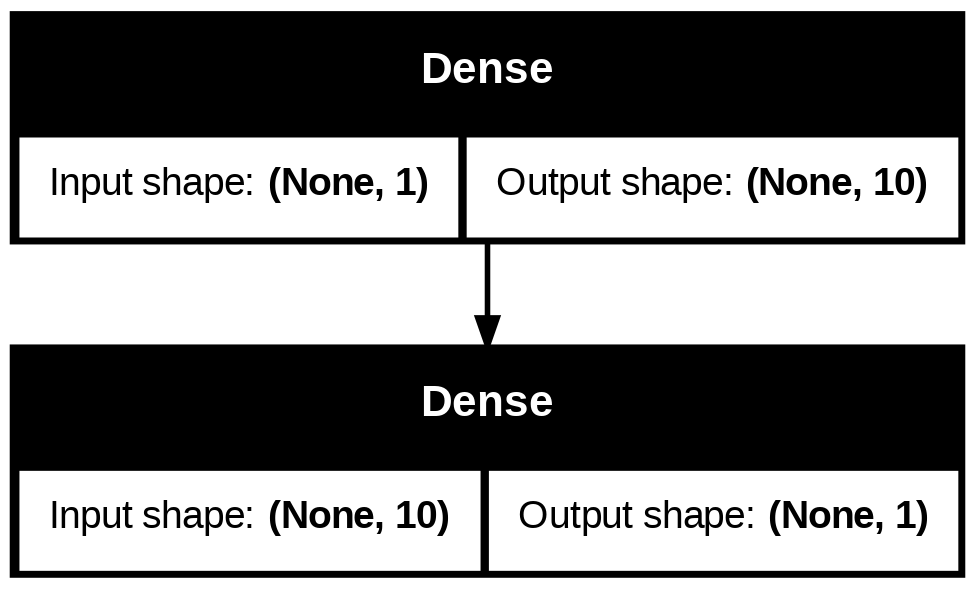

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# visualizing our model' predictions

To visualize predictions, it's a good idea to plot them against the ground trtuth labels.

Often you'll see in the form of `Y_test` versus `Y_pred` (ground truth versus your model's predictions).

In [24]:
# make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([[39.684845],
       [42.222157],
       [44.759468],
       [47.296776],
       [49.834087],
       [52.3714  ],
       [54.908707],
       [57.44602 ],
       [59.983326],
       [62.52064 ]], dtype=float32)

In [25]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [26]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note**: If you feel like you're going to rescue some kind of functionality in the future, it's good idea to turn it into a function

In [27]:
# Let's create a plotting functions
def plot_predictions(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_label=Y_test,
                    predictions=Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Prediction data")
  # show legend
  plt.legend()

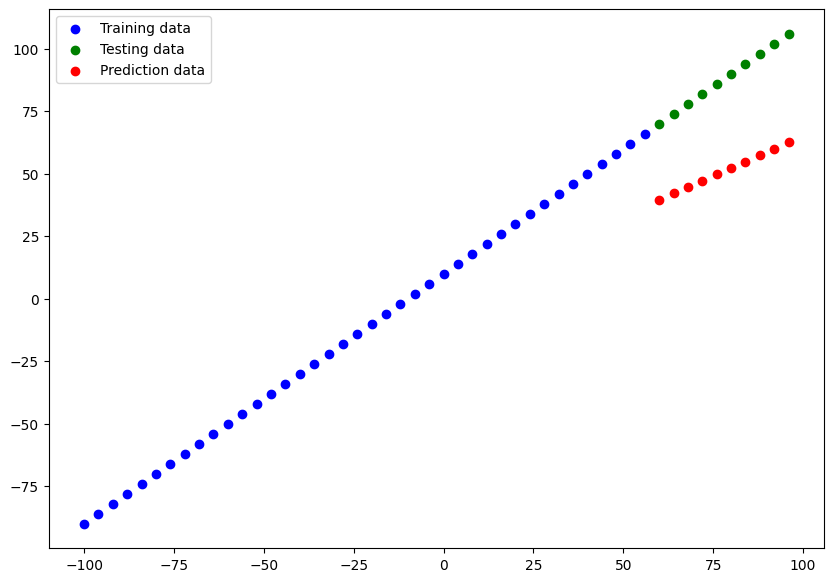

In [28]:
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_label=Y_test, predictions=Y_pred)

Lets optimize our model

In [29]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, name="output")
], name="model_2")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Try some predictions
Y_pred = model.predict(X_test)
Y_pred , Y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


(array([[ 66.827225],
        [ 70.63767 ],
        [ 74.44812 ],
        [ 78.25855 ],
        [ 82.069   ],
        [ 85.87943 ],
        [ 89.68988 ],
        [ 93.50032 ],
        [ 97.310776],
        [101.12121 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

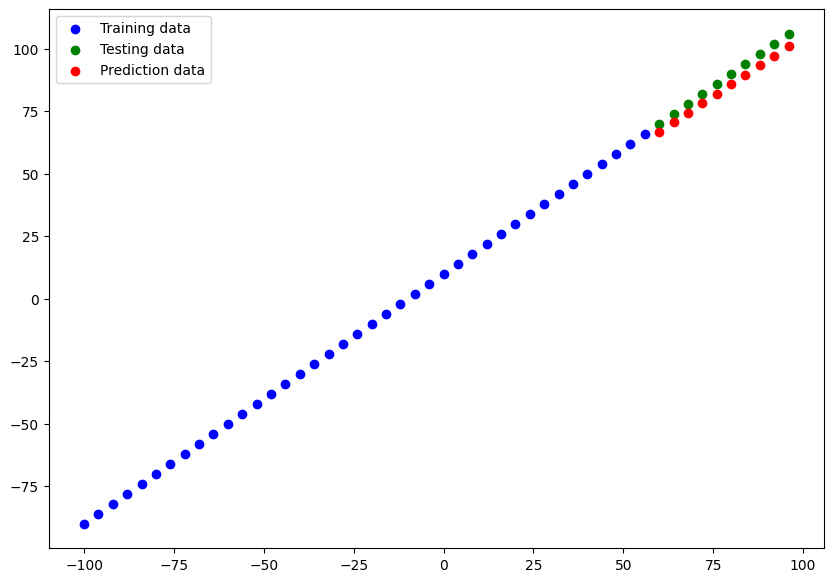

In [31]:
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_label=Y_test, predictions=Y_pred)

### Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

- **Mean absolute error (MAE)** - the mean difference between each of the predictions.
- **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [32]:
# Evaluate the model on test set
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 4.0258 - mae: 4.0258


[4.025781154632568, 4.025781154632568]

In [33]:
# calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(Y_test, Y_pred).numpy()
mae

np.float32(4.025781)

In [34]:
Y_pred.shape

(10, 1)

In [35]:
Y_test.shape

TensorShape([10])

In [36]:
tf.squeeze(Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 66.827225,  70.63767 ,  74.44812 ,  78.25855 ,  82.069   ,
        85.87943 ,  89.68988 ,  93.50032 ,  97.310776, 101.12121 ],
      dtype=float32)>

In [37]:
Y_pred.shape

(10, 1)

In [38]:
# calculate the mean squared error
mae = tf.keras.metrics.MeanSquaredError()(Y_test, Y_pred).numpy()
mae

np.float32(16.503353)

In [39]:
# Make some functions to reuse MAE and MSE
def mae(Y_true, Y_pred):
  return tf.keras.metrics.MeanAbsoluteError()(Y_true, Y_pred).numpy()

def mse(Y_true, Y_pred):
  return tf.keras.metrics.MeanSquaredError()(Y_true, Y_pred).numpy()

### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. ``Get more data`` - get more examples for your model to train on (more opportunities to learn patterns).
2. ``Make your model larger (use a more complex model)`` - this might come in the form of more layers or more hidden units in each layer.
3. ``Train for longer`` - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. ``model_1`` - same as original model, 1 layer, trained for 100 epochs.
2. ``model_2`` - 2 layers, trained for 100 epochs.
3. ``model_3`` - 2 layers, trained for 500 epochs.

**``Build model_1``**

In [40]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model_1
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


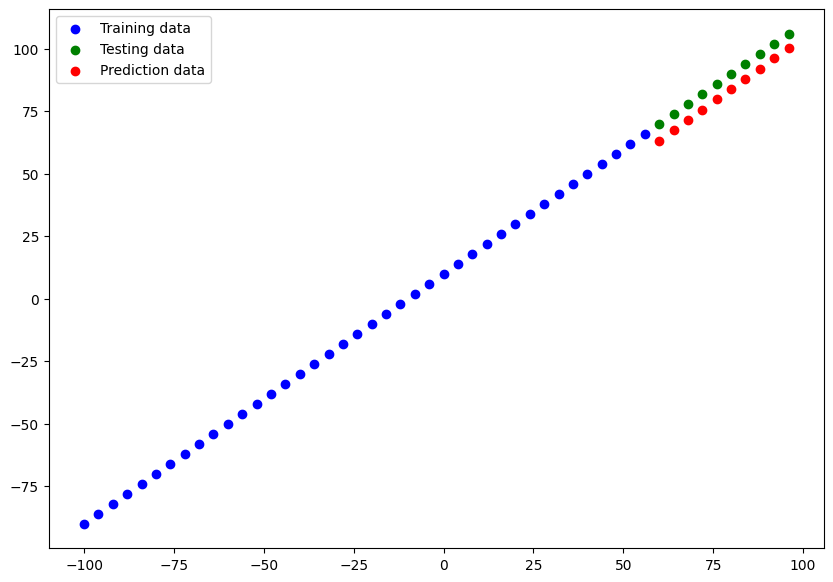

In [41]:
# Make and plot for prediction model_1
Y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

In [42]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, Y_preds_1)
mse_1 = mse(Y_test, Y_preds_1)
mae_1, mse_1

(np.float32(6.216447), np.float32(38.76748))

**``Build model_2``**
* 2 dense layer, trained for 100 epochs

In [43]:
# Lets build model 2
# set random seed
tf.random.set_seed(42)

# 1. make the model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


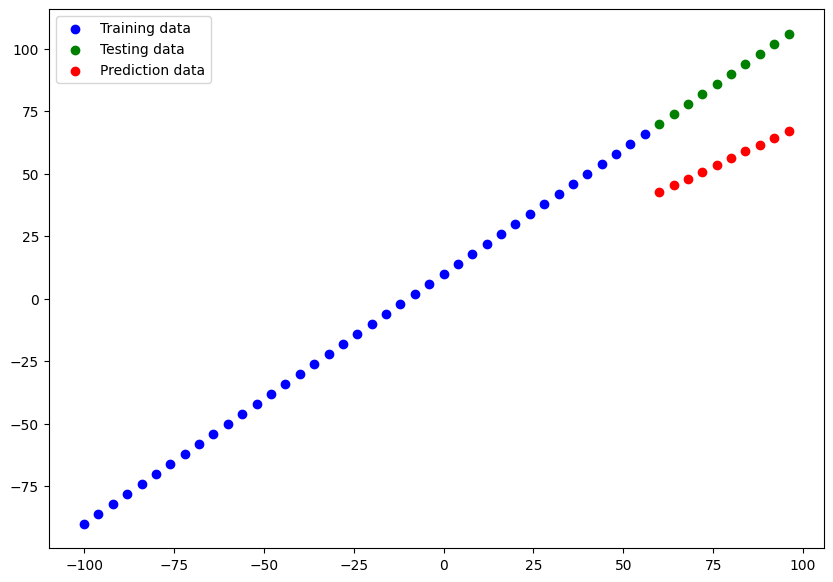

In [44]:
# Make and plot for prediction model_2
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [45]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, Y_preds_2)
mse_2 = mse(Y_test, Y_preds_2)
mae_2, mse_2

(np.float32(33.115883), np.float32(1110.3544))

**``Build model_3``**

* 2 layers, trained for 500 epochs

In [57]:
# let's build model_3

#set random seed
tf.random.set_seed(42)

# 1. make the model_3
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# 3. fit he model
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500, verbose=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


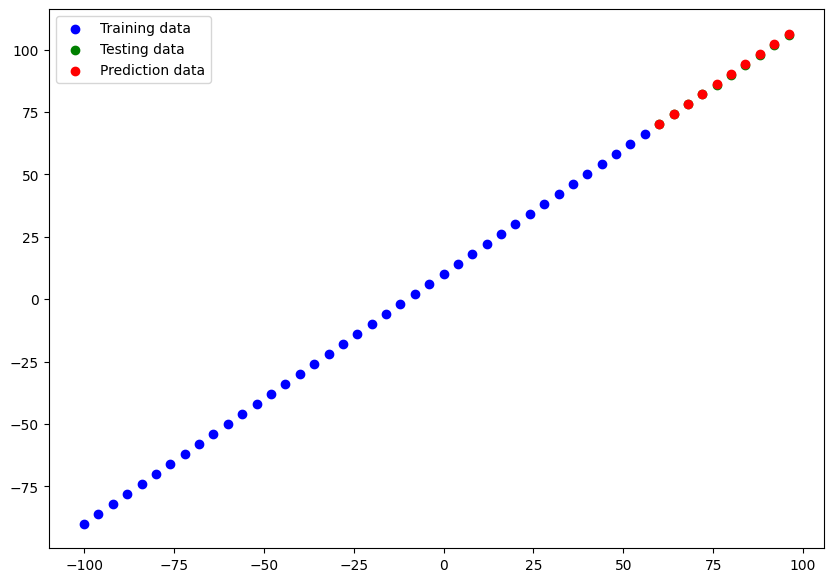

In [58]:
# Make and plot for prediction model_3
Y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_preds_3)

In [59]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, Y_preds_3)
mse_3 = mse(Y_test, Y_preds_3)
mae_3, mse_3

(np.float32(0.26466447), np.float32(0.071603134))

In [60]:
model_3.predict(np.array([1000.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[1013.4301]], dtype=float32)

# Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [63]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,6.216447,38.767479
1,model_2,33.115883,1110.354370
2,model_3,0.264664,0.071603
